In [1]:
# Importing necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

# Load the data

In [2]:
df=pd.read_csv("Data_Airline.csv")
df.shape

(129880, 24)

In [4]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


# Data Pre-processing

In [11]:
# duplicates - handling part

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
129875    False
129876    False
129877    False
129878    False
129879    False
Length: 129880, dtype: bool

In [12]:
df.duplicated().sum()

0

In [4]:
# wrong dtypes handling

df.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                            object
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [22]:
error_values=df[pd.to_numeric(df['Flight Distance'],errors='coerce').isnull()] ['Flight Distance'].value_counts()
print(error_values)

Flight Distance
3655$    1
22%7     1
2$27     1
Name: count, dtype: int64


In [4]:
df['Flight Distance']=df['Flight Distance'].replace({'3655$':3655,'22%7':227,'2$27':227})

In [5]:
df['Flight Distance']=df['Flight Distance'].astype('int64')

In [8]:
df.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [8]:
# Null values

df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [13]:
df.isnull().sum().sum()

393

In [14]:
df.isnull().sum()/len(df)*100 # percentage of null values

ID                                        0.000000
Gender                                    0.000000
Age                                       0.000000
Customer Type                             0.000000
Type of Travel                            0.000000
Class                                     0.000000
Flight Distance                           0.000000
Departure Delay                           0.000000
Arrival Delay                             0.302587
Departure and Arrival Time Convenience    0.000000
Ease of Online Booking                    0.000000
Check-in Service                          0.000000
Online Boarding                           0.000000
Gate Location                             0.000000
On-board Service                          0.000000
Seat Comfort                              0.000000
Leg Room Service                          0.000000
Cleanliness                               0.000000
Food and Drink                            0.000000
In-flight Service              

In [6]:
df['Arrival Delay']=df['Arrival Delay'].fillna(df['Arrival Delay'].median())

In [7]:
df.isnull().sum().sum()

0

In [11]:
df.dtypes # convert all numericcols into int64

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [7]:
df['Arrival Delay']=df['Arrival Delay'].astype('int64') 

# EDA

In [8]:
df.drop('ID',axis=1,inplace=True)

In [9]:
print('objective columns:')
obj_cols=df.select_dtypes(include='object').columns
print(obj_cols)

objective columns:
Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'], dtype='object')


In [10]:
print('numeric columns:')
num_cols=df.select_dtypes(exclude='object').columns
print(num_cols)

numeric columns:
Index(['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')


In [12]:
len(num_cols)

18

In [25]:
# univarient analysis for numeric columns

df[num_cols].describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.045465,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.416353,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


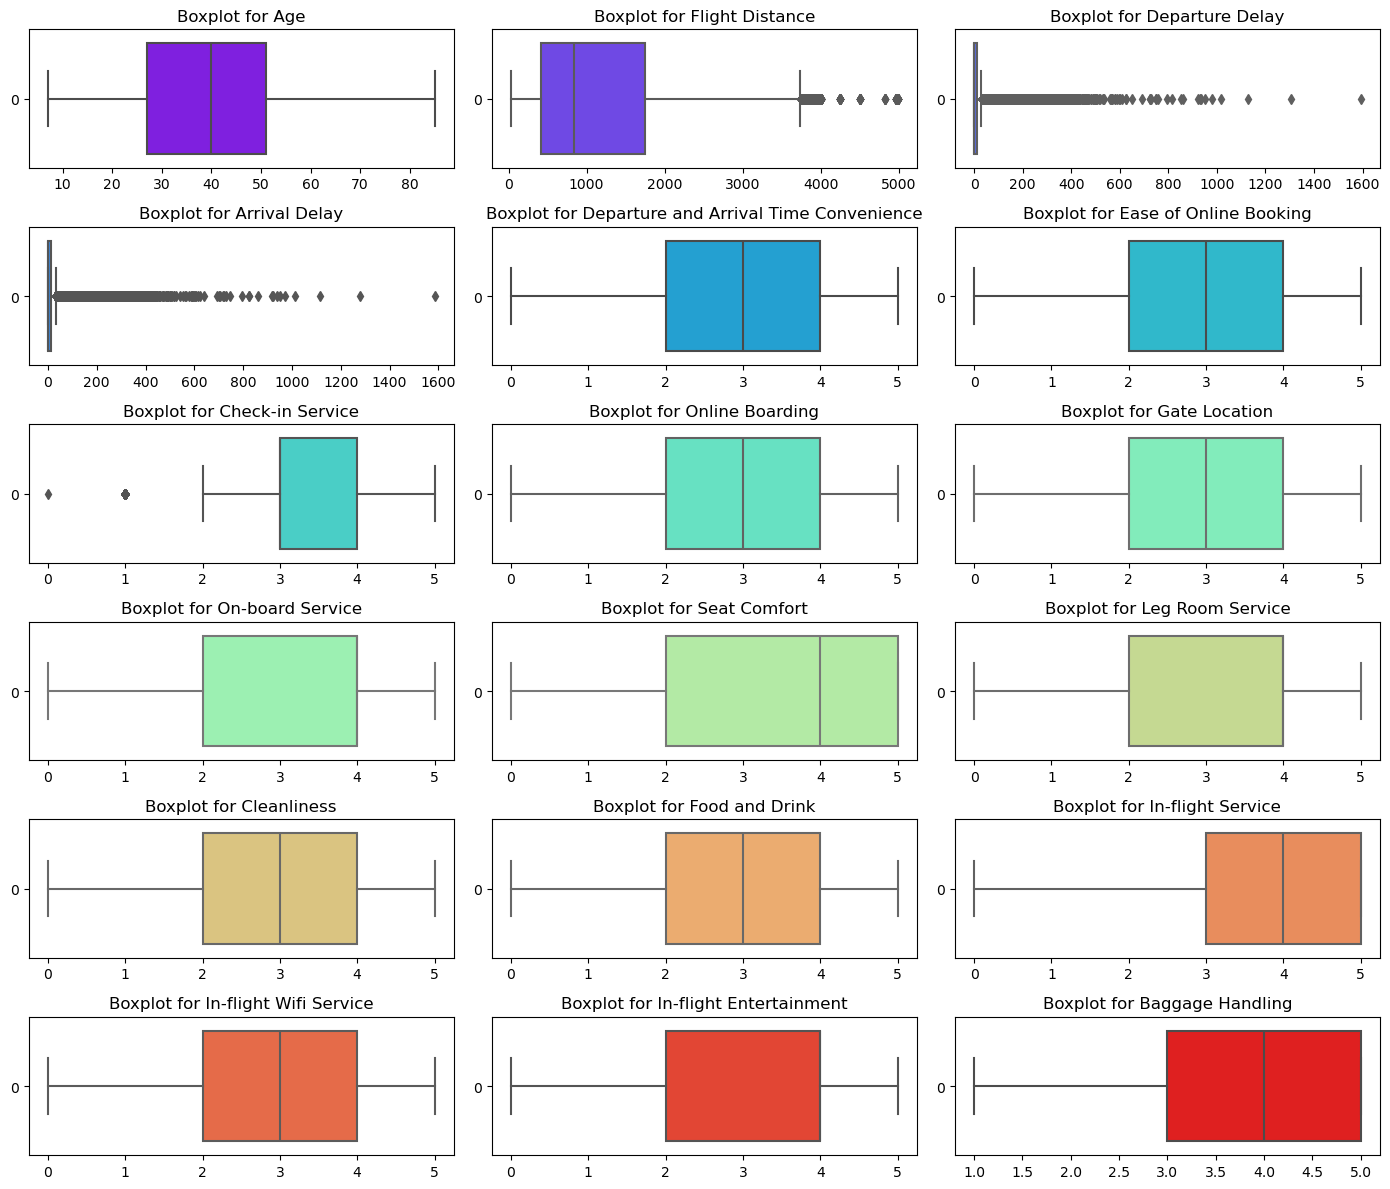

In [18]:
fig,axs=plt.subplots(6,3,figsize=(14,12))

colors=plt.cm.rainbow(np.linspace(0,1,len(num_cols)))

for i,cols in enumerate(num_cols):
    ax=axs[i//3,i%3]
    sns.boxplot(data=df[cols],ax=ax,color=colors[i],orient='h')
    ax.set_title(f'Boxplot for {cols}')

plt.tight_layout()
plt.show()

In [31]:
# univarient analysis for categorical cols

for cols in obj_cols:
    print('value_counts of:',df[cols].value_counts())

value_counts of: Gender
Female    65899
Male      63981
Name: count, dtype: int64
value_counts of: Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64
value_counts of: Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64
value_counts of: Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64
value_counts of: Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64


In [19]:
len(obj_cols)

5

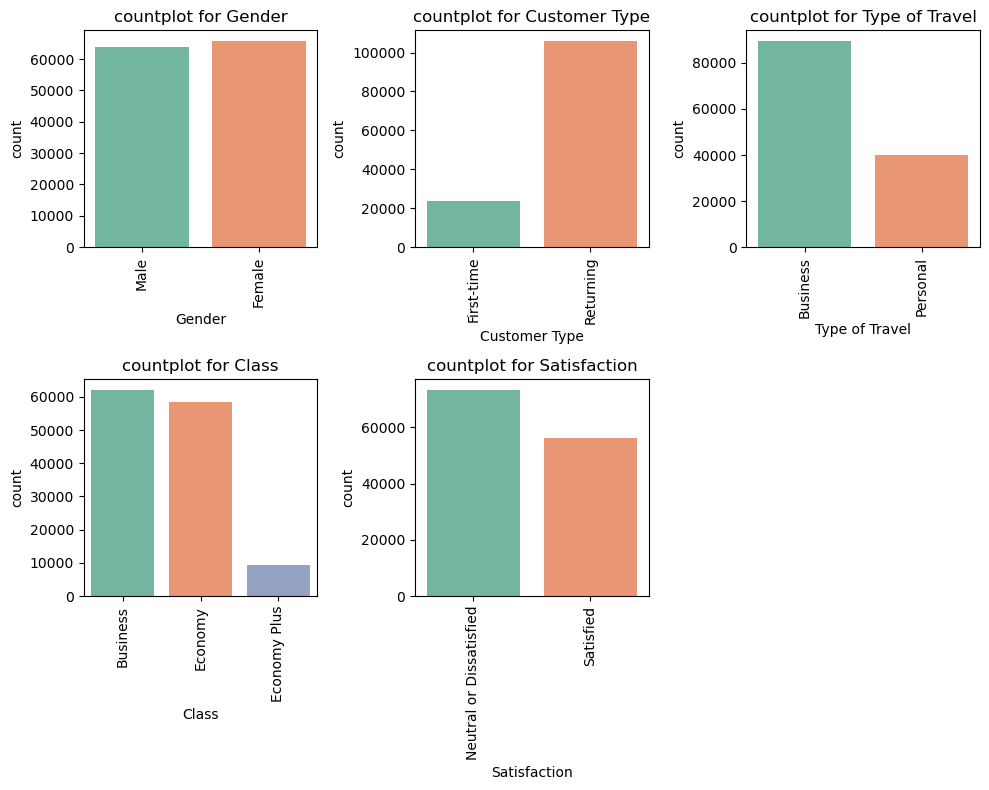

In [21]:
fig,axs=plt.subplots(2,3,figsize=(10,8))

for i,cols in enumerate(obj_cols):
    ax=axs[i//3,i%3]
    sns.countplot(data=df,x=cols,ax=ax,palette='Set2')
    ax.set_title(f'countplot for {cols}')
    ax.tick_params(axis='x',rotation=90)

if len(obj_cols)%3!=0:
    axs[-1,-1].axis('off')

plt.tight_layout()
plt.show()

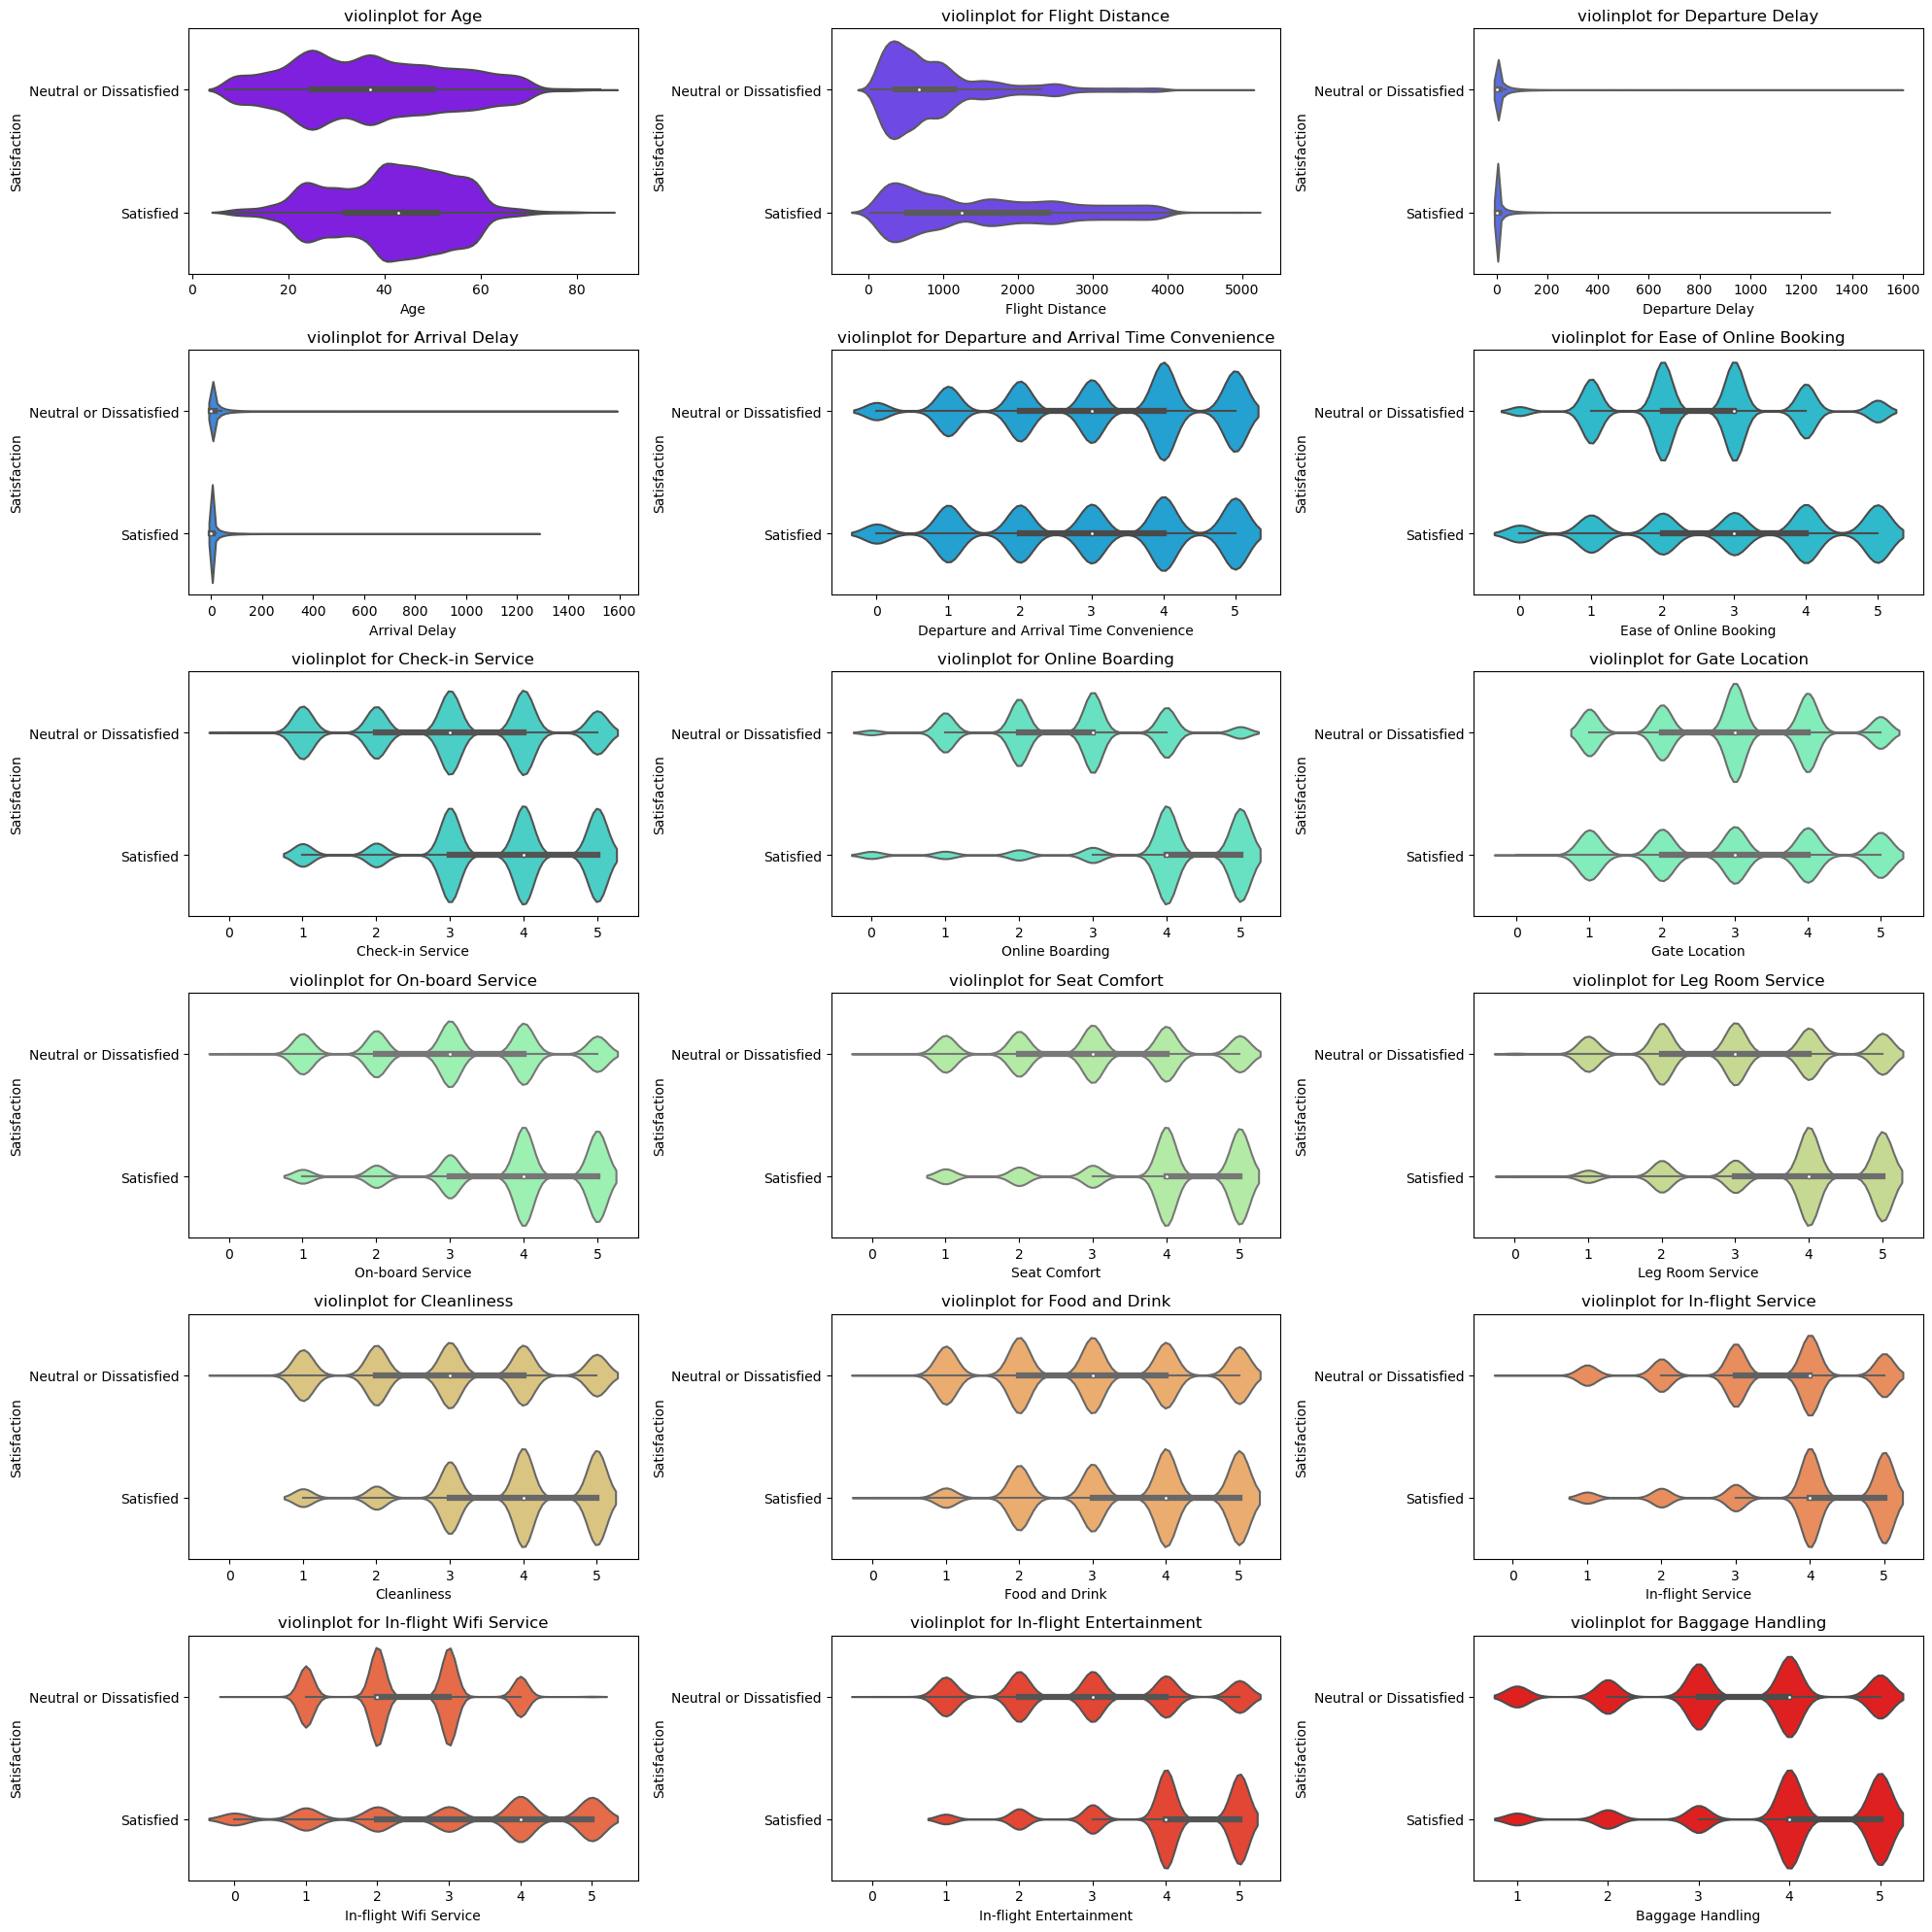

In [14]:
# Bivarient analysis for numerical cols v/s Target col
fig,axs=plt.subplots(6,3,figsize=(20,20))

colors=plt.cm.rainbow(np.linspace(0,1,len(num_cols)))

for i,cols in enumerate(num_cols):
    ax=axs[i//3,i%3]
    sns.violinplot(data=df,x=cols,y='Satisfaction',ax=ax,color=colors[i])
    ax.set_title(f'violinplot for {cols}')

plt.tight_layout()
plt.show()

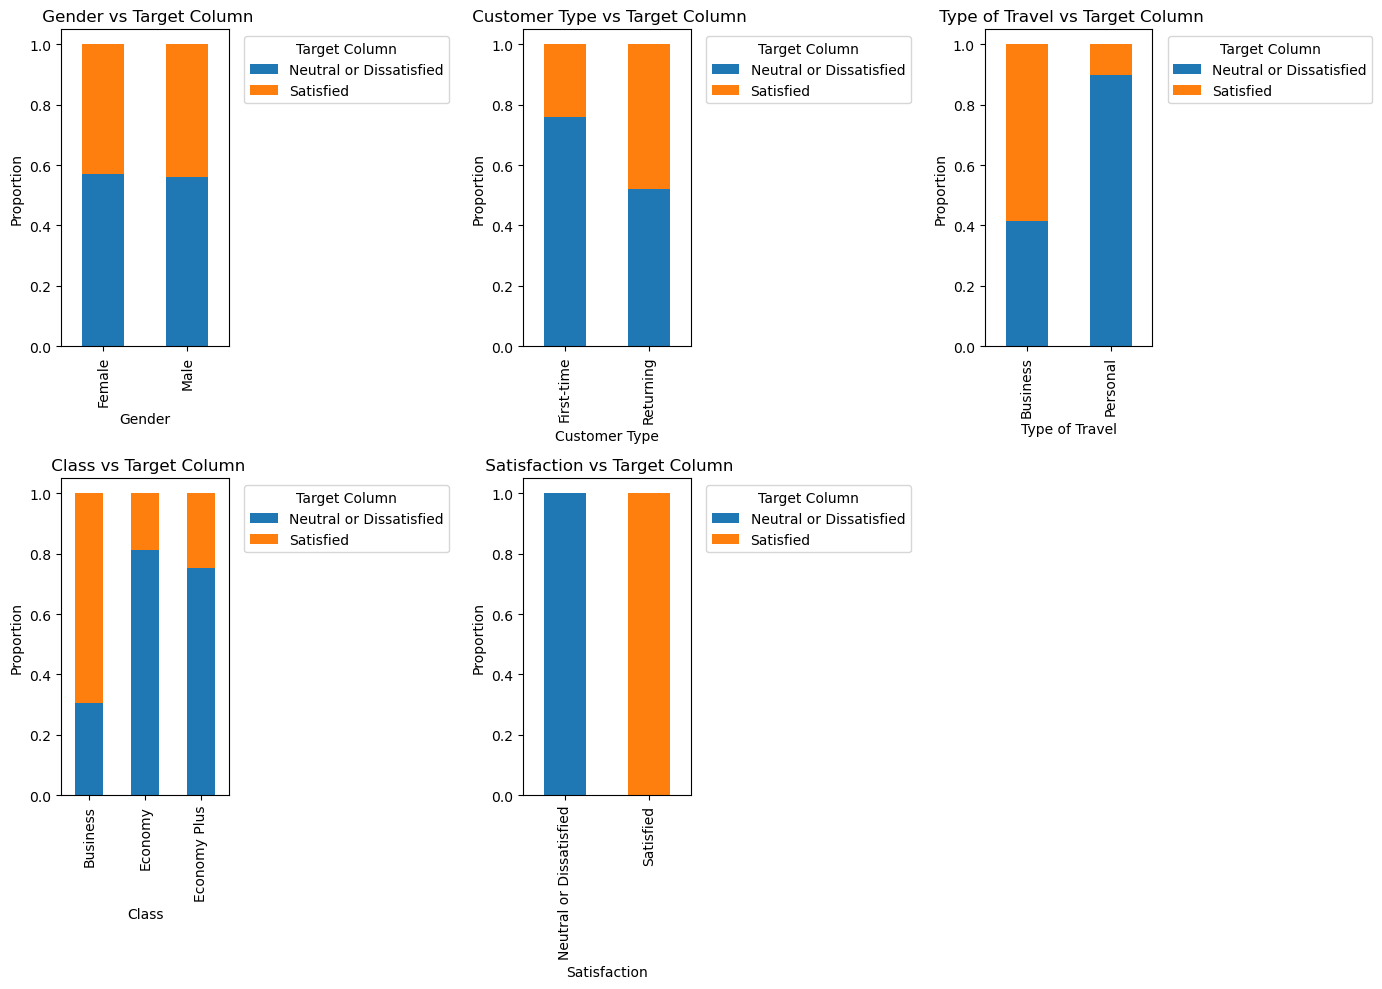

In [14]:
# Bivarient analysis for categorical cols

fig, axs = plt.subplots(2, 3, figsize=(14, 10))

for i, cols in enumerate(obj_cols):
    ax=axs[i//3,i%3]
    ct = pd.crosstab(df[cols], df['Satisfaction'], normalize='index') # Creating a cross tab
    ct.plot(kind='bar', stacked=True, ax=ax) # If you want unstacked barplot then change stacked =False
    ax.set_title(f' {cols} vs Target Column')
    ax.set_xlabel(cols)
    ax.set_ylabel('Proportion')
    ax.legend(title='Target Column', bbox_to_anchor=(1.05, 1), loc='upper left')

if len(obj_cols)%3!=0:
    axs[-1,-1].axis('off')

plt.tight_layout()
plt.show() 

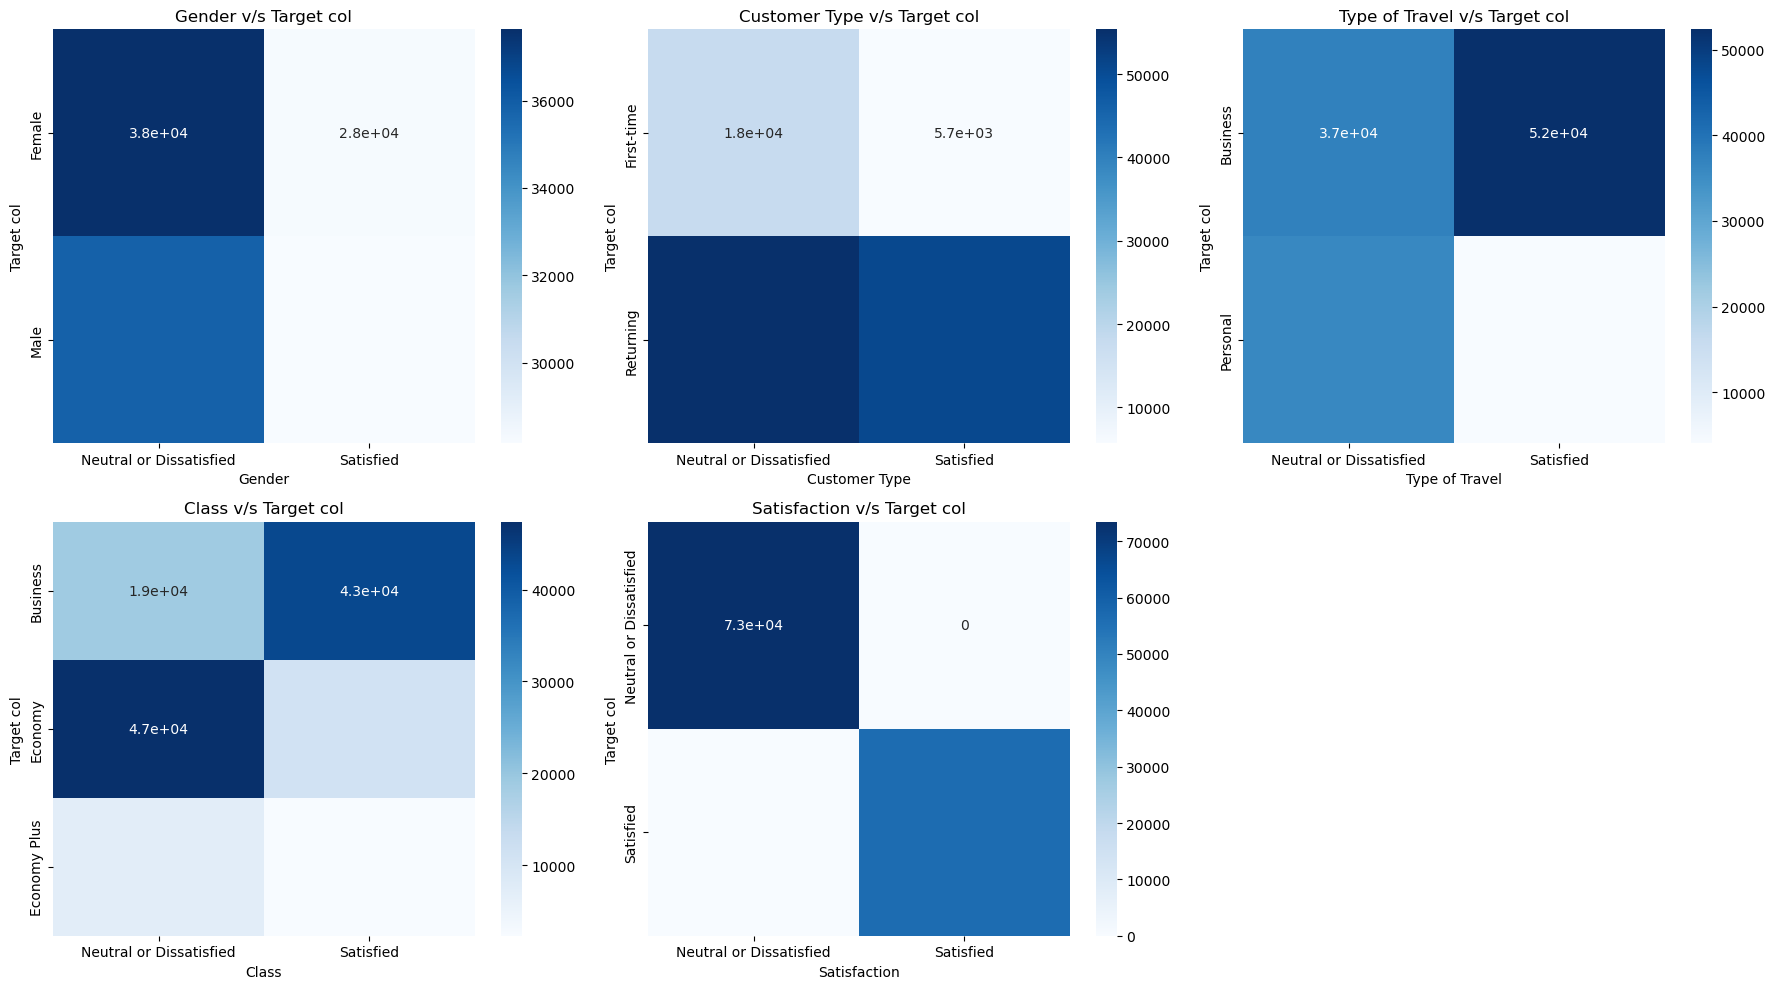

In [20]:
# Heatmap for categorical cols v/s Target col

fig,axs=plt.subplots(2,3,figsize=(18,10))
for i,cols in enumerate(obj_cols):
    ax=axs[i//3,i%3]
    ct=pd.crosstab(df[cols],df['Satisfaction'])
    sns.heatmap(ct,annot=True,cmap='Blues', ax=ax)
    ax.set_title(f'{cols} v/s Target col')
    ax.set_xlabel(cols)
    ax.set_ylabel('Target col')

if len(obj_cols)%3!=0:
    axs[-1,-1].axis('off')

plt.tight_layout()
plt.show()

# split data into train and test

In [11]:
# split the data into independent and dependent variables
x = df.drop('Satisfaction', axis=1)
y = df['Satisfaction']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Encoding Part

In [13]:
# encoding of x_train data

x_train.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
21413,Female,37,Returning,Business,Business,2185,18,13,2,2,4,5,2,4,2,4,3,5,4,2,4,4
7284,Male,10,Returning,Personal,Economy,135,489,491,4,0,4,4,4,3,4,4,4,0,5,3,4,5
86080,Male,21,First-time,Business,Economy,306,1,0,0,4,5,4,5,3,4,4,4,4,5,4,4,4
59842,Male,54,Returning,Business,Business,3000,16,4,2,2,3,4,2,5,4,5,3,2,5,2,5,5
69486,Male,22,Returning,Business,Economy Plus,944,11,10,4,4,3,1,4,2,2,2,1,1,4,1,1,4


In [14]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [18]:
# select the columns to encode

cols_to_encode=x_train.select_dtypes(include='object').columns

ohe=OneHotEncoder(sparse_output=False)
encoded_cols=ohe.fit_transform(x_train[cols_to_encode])

# select column names

column_names=ohe.get_feature_names_out()

# create a dataframe for encoded columns

encoded_df=pd.DataFrame(encoded_cols,columns=column_names,index=x_train.index)

# concat x_train and encoded_df

x_train=pd.concat([x_train.drop(cols_to_encode,axis=1),encoded_df],axis=1)

In [19]:
# y_train data encoding

y_train.head()

21413                  Satisfied
7284     Neutral or Dissatisfied
86080                  Satisfied
59842                  Satisfied
69486    Neutral or Dissatisfied
Name: Satisfaction, dtype: object

In [20]:
y_train=y_train.map({'Neutral or Dissatisfied':0,'Satisfied':1})

In [21]:
# x_test data encoding

cols_to_encode=x_test.select_dtypes(include='object').columns

# ohe=OneHotEncoder(sparse_output=False)   no need to write this code again already used in x_train

encoded_cols=ohe.transform(x_test[cols_to_encode])

# select column names

column_names=ohe.get_feature_names_out()

# create a dataframe for encoded columns

encoded_df=pd.DataFrame(encoded_cols,columns=column_names,index=x_test.index)

# concat x_test and encoded_df

x_test=pd.concat([x_test.drop(cols_to_encode,axis=1),encoded_df],axis=1)

In [22]:
# y_test data encoding
y_test=y_test.map({'Neutral or Dissatisfied':0,'Satisfied':1})

In [23]:
print(x_train.shape ,y_train.shape)
print(x_test.shape ,y_test.shape)

(103904, 27) (103904,)
(25976, 27) (25976,)


# Feature Scaling

In [24]:
# scaling x_train and x_test data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Selection

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [28]:
# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train_scaled, y_train)
y_pred_lr = logit.predict(x_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [29]:
# RandomForest
rforest = RandomForestClassifier()
rforest = rforest.fit(x_train_scaled, y_train)
y_pred_rf = rforest.predict(x_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [30]:
# XGBoost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train_scaled, y_train)
y_pred_xg = xgboost.predict(x_test_scaled)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

In [31]:
# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit),  ('rforest',rforest),('xgboost',xgboost)
                                           ])
model_evc = model_evc.fit(x_train_scaled, y_train)
pred_evc = model_evc.predict(x_test_scaled)
accuracy_evc = accuracy_score(y_test, pred_evc)

      Method Used  Accuracy
0  LogitRegession  0.873999
1         RForest  0.963428
2             XGB  0.964005
3          Voting  0.963312
Axes(0.125,0.11;0.775x0.77)


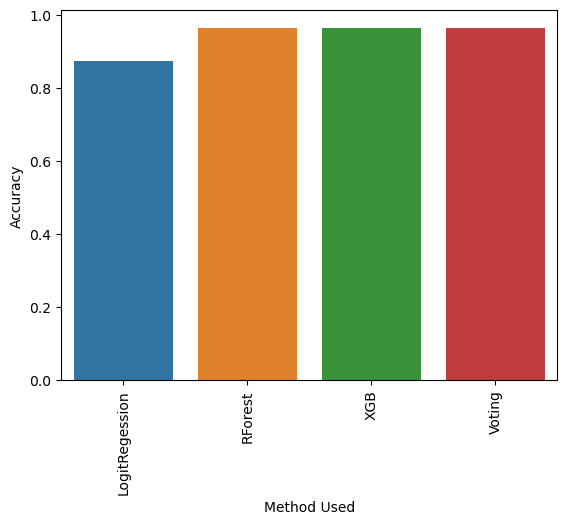

In [32]:
list1 = ['LogitRegession','RForest','XGB','Voting']
list2 = [accuracy_lr,accuracy_rf,accuracy_xg,accuracy_evc]
list3 = [logit,rforest,xgboost,model_evc]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)   

In [33]:
# Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off

pred_xgboost_train = xgboost.predict(x_train_scaled)
pred_xgboost_test = xgboost.predict(x_test_scaled)
accuracy_xgboost_train = accuracy_score(y_train, pred_xgboost_train)
accuracy_xgboost_test = accuracy_score(y_test, pred_xgboost_test)

print("************************")
print("Training Accuracy :",accuracy_xgboost_train)
print("************************")
print("Testb Accuracy :",accuracy_xgboost_test)

************************
Training Accuracy : 0.9750057745611334
************************
Testb Accuracy : 0.9640052356020943


# Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(xgboost, x_train_scaled, y_train, cv=10)
print("Training Accuracy :", training.mean())
print("***************")
print("Testb Accuracy :",accuracy_xgboost_test)

Training Accuracy : 0.9630812729495215
***************
Testb Accuracy : 0.9640052356020943


In [46]:
training

array([0.96246752, 0.96699066, 0.96631701, 0.96294871, 0.96323388,
       0.96044273, 0.96275265, 0.96833494, 0.966795  , 0.96458133])

In [47]:
# Classification report

In [35]:
print("************************")
print("Training Accuracy :",classification_report(y_train, pred_xgboost_train))
print("************************")
print("Testb Accuracy :",classification_report(y_test, pred_xgboost_test))

************************
Training Accuracy :               precision    recall  f1-score   support

           0       0.97      0.99      0.98     58729
           1       0.98      0.96      0.97     45175

    accuracy                           0.98    103904
   macro avg       0.98      0.97      0.97    103904
weighted avg       0.98      0.98      0.97    103904

************************
Testb Accuracy :               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.95      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [36]:
# Confusion Matrix
print("************************")
print(confusion_matrix(y_train, pred_xgboost_train))
print("************************")
print(confusion_matrix(y_test, pred_xgboost_test))

************************
[[58003   726]
 [ 1871 43304]]
************************
[[14405   318]
 [  617 10636]]
